# Approximated State Preparation

This tutorial demonstrates an approximated quantum function: a state preparation. Depending on the given functional error, the synthesis engine automatically chooses implementation with fewer resources. The demonstration is on a random state vector, of size $2^6$.

In [2]:
import numpy as np

NUM_QUBITS = 6
np.random.seed(12)
amplitudes = 1 - 2 * np.random.rand(2**NUM_QUBITS)
amplitudes = (amplitudes / np.linalg.norm(amplitudes)).tolist()

In [3]:
bounds = np.linspace(0.0, 0.3, 10)
print("The upper bounds:", bounds)

The upper bounds: [0.         0.03333333 0.06666667 0.1        0.13333333 0.16666667
 0.2        0.23333333 0.26666667 0.3       ]


In [4]:
from classiq import (
    GeneratedCircuit,
    QArray,
    QFunc,
    create_model,
    prepare_amplitudes,
    set_constraints,
    set_preferences,
    show,
    synthesize,
)
from classiq.model import (
    Constraints,
    CustomHardwareSettings,
    OptimizationParameter,
    Preferences,
)

preferences = Preferences(
    custom_hardware_settings=CustomHardwareSettings(basis_gates=["cx", "u"]),
    random_seed=1235,
    optimization_timeout_seconds=100,
    transpilation_option="custom",
)


depths = []
cx_counts = []


for b in bounds:

    @QFunc
    def main() -> None:
        out = QArray("out")
        prepare_amplitudes(amplitudes=amplitudes, bound=b, out=out)

    qmod = create_model(main)
    qmod = set_preferences(qmod, preferences)
    qprog = synthesize(qmod)

    circuit = GeneratedCircuit.from_qprog(qprog)
    depths.append(circuit.transpiled_circuit.depth)
    cx_counts.append(circuit.transpiled_circuit.count_ops["cx"])

In [5]:
print("classiq depths:", depths)
print("cx-counts depths:", cx_counts)

classiq depths: [9874, 8721, 8259, 7908, 7677, 7447, 6986, 6755, 6525, 6295]
cx-counts depths: [6548, 5748, 5428, 5196, 5036, 4876, 4556, 4396, 4236, 4076]


(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35]),
 [Text(-0.05, 0, '$\\mathdefault{−0.05}$'),
  Text(0.0, 0, '$\\mathdefault{0.00}$'),
  Text(0.05, 0, '$\\mathdefault{0.05}$'),
  Text(0.10000000000000002, 0, '$\\mathdefault{0.10}$'),
  Text(0.15000000000000002, 0, '$\\mathdefault{0.15}$'),
  Text(0.2, 0, '$\\mathdefault{0.20}$'),
  Text(0.25000000000000006, 0, '$\\mathdefault{0.25}$'),
  Text(0.30000000000000004, 0, '$\\mathdefault{0.30}$'),
  Text(0.35000000000000003, 0, '$\\mathdefault{0.35}$')])

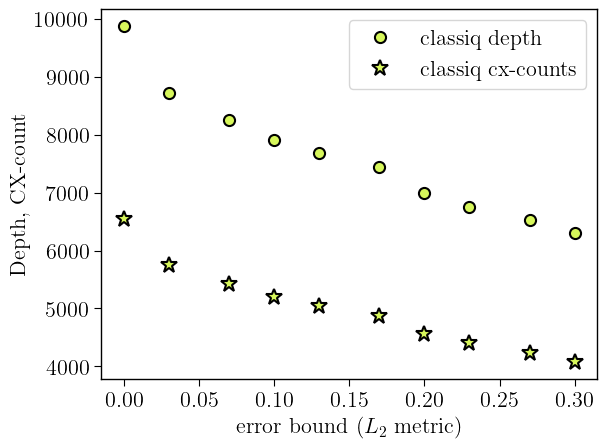

In [11]:
import matplotlib.pyplot as plt

classiq_color = "#D7F75B"
plt.rc("text", usetex=True)
plt.rcParams["font.family"] = "serif"
plt.rc("savefig", dpi=300)

plt.rcParams["axes.linewidth"] = 1
plt.rcParams["xtick.major.size"] = 5
plt.rcParams["xtick.minor.size"] = 5
plt.rcParams["ytick.major.size"] = 5
plt.rcParams["ytick.minor.size"] = 5


plt.plot(
    np.round(bounds, 2),
    depths,
    "o",
    label="classiq depth",
    markerfacecolor=classiq_color,
    markeredgecolor="k",
    markersize=8,
    markeredgewidth=1.5,
)
plt.plot(
    np.round(bounds, 2),
    cx_counts,
    "*",
    label="classiq cx-counts",
    markerfacecolor=classiq_color,
    markeredgecolor="k",
    markersize=12,
    markeredgewidth=1.5,
)


plt.legend(fontsize=16, loc="upper right")


plt.ylabel("Depth, CX-count", fontsize=16)
plt.xlabel("error bound ($L_2$ metric)", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)